In [1]:
import pandas as pd
matches1 = pd.read_csv('../../feature_creation/data/matches_2018-2023_raw.csv')
matches2 = pd.read_csv('../../feature_creation/data/matches_2024_raw.csv')
matches = pd.concat([matches1, matches2])

In [10]:
graph_data = {}

In [11]:
player_id = 104925
matches['Surface'] = matches['Surface'].str.lower()
player_matches = matches[(matches['winner_id'] == player_id) | (matches['loser_id'] == player_id)]

player_matches['is_win'] = player_matches['winner_id'] == player_id

surface_stats = player_matches.groupby('Surface').agg(
    total_matches=('is_win', 'size'),
    wins=('is_win', 'sum')
).reset_index()

surface_stats['win_percentage'] = (surface_stats['wins'] / surface_stats['total_matches']) * 100
graph_data['Novak Djokovic'] = surface_stats
print(surface_stats)

  Surface  total_matches  wins  win_percentage
0    clay            116    93       80.172414
1   grass             47    44       93.617021
2    hard            179   158       88.268156


C:\Users\Pawel\AppData\Local\Temp\ipykernel_38592\1541747978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_matches['is_win'] = player_matches['winner_id'] == player_id


In [12]:
player_id = 104745
matches['Surface'] = matches['Surface'].str.lower()
player_matches = matches[(matches['winner_id'] == player_id) | (matches['loser_id'] == player_id)]

player_matches['is_win'] = player_matches['winner_id'] == player_id

surface_stats = player_matches.groupby('Surface').agg(
    total_matches=('is_win', 'size'),
    wins=('is_win', 'sum')
).reset_index()

surface_stats['win_percentage'] = (surface_stats['wins'] / surface_stats['total_matches']) * 100
graph_data['Rafael Nadal'] = surface_stats
print(surface_stats)

  Surface  total_matches  wins  win_percentage
0    clay            107    92       85.981308
1   grass             18    15       83.333333
2    hard             96    80       83.333333


C:\Users\Pawel\AppData\Local\Temp\ipykernel_38592\2615137710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_matches['is_win'] = player_matches['winner_id'] == player_id


In [13]:
player_id = 106421
matches['Surface'] = matches['Surface'].str.lower()
player_matches = matches[(matches['winner_id'] == player_id) | (matches['loser_id'] == player_id)]

player_matches['is_win'] = player_matches['winner_id'] == player_id

surface_stats = player_matches.groupby('Surface').agg(
    total_matches=('is_win', 'size'),
    wins=('is_win', 'sum')
).reset_index()

surface_stats['win_percentage'] = (surface_stats['wins'] / surface_stats['total_matches']) * 100
graph_data['Daniil Medvedev'] = surface_stats
print(surface_stats)

  Surface  total_matches  wins  win_percentage
0    clay             60    36       60.000000
1   grass             54    37       68.518519
2    hard            308   241       78.246753


C:\Users\Pawel\AppData\Local\Temp\ipykernel_38592\1253251859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_matches['is_win'] = player_matches['winner_id'] == player_id


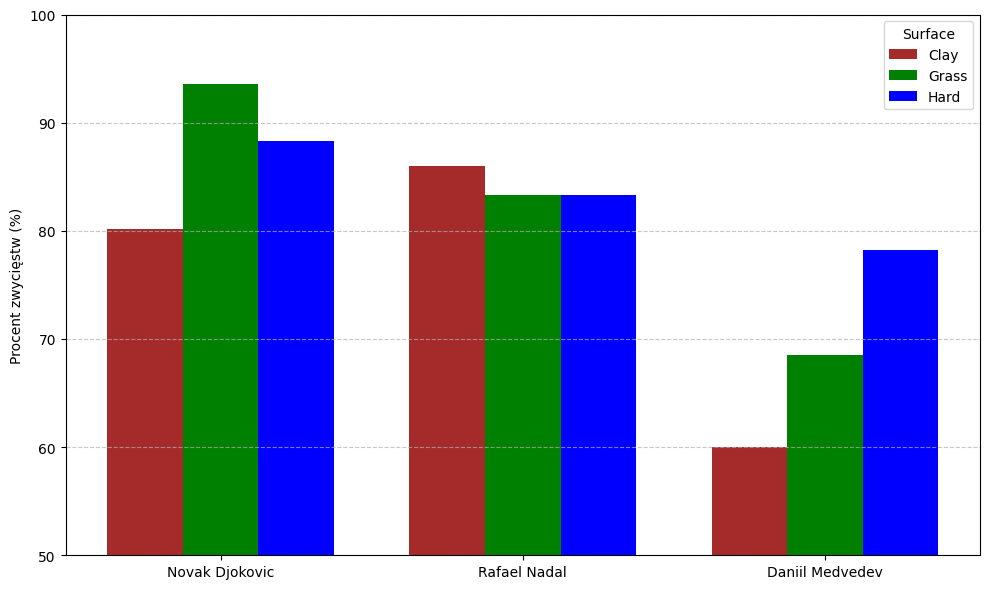

In [23]:
import numpy as np
import matplotlib.pyplot as plt
players = list(graph_data.keys())
surfaces = graph_data[players[0]]['Surface']
x = np.arange(len(players))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

surface_colors = {
    'clay': 'brown',
    'grass': 'green',
    'hard': 'blue'
}

for i, surface in enumerate(surfaces):
    surface_values = [graph_data[player].loc[graph_data[player]['Surface'] == surface, 'win_percentage'].values[0] for player in players]
    ax.bar(x + i * bar_width, surface_values, width=bar_width, label=surface.capitalize(), color=surface_colors[surface])

ax.set_ylabel('Procent zwycięstw (%)')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(players)
ax.set_ylim(50, 100)
ax.legend(title='Surface')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("surface_importance_plot.pdf", format="pdf")
plt.tight_layout()

plt.show()


### ENTRY

Win Percentage for LL: 35.03%
Win Percentage for Q: 40.70%
Win Percentage for WC: 38.89%


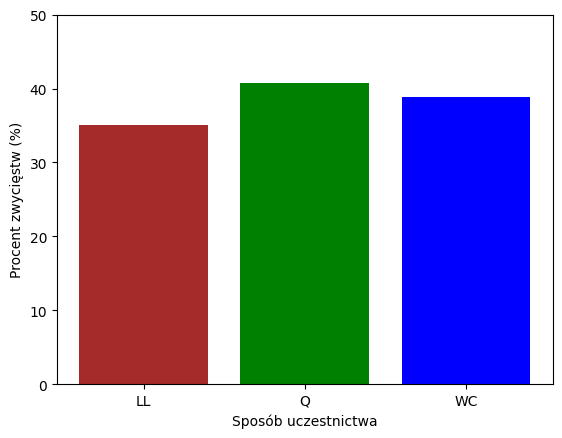

In [30]:
entry_types = ['LL', 'Q', 'WC']
win_percentages = {}

for entry in entry_types:
    winner_col = f'winner_entry_{entry}'
    loser_col = f'loser_entry_{entry}'
    
    wins = matches[winner_col].sum()
    occurrences = matches[winner_col].sum() + matches[loser_col].sum()
    
    win_percentages[entry] = (wins / occurrences * 100) if occurrences > 0 else 0

for entry, percentage in win_percentages.items():
    print(f"Win Percentage for {entry}: {percentage:.2f}%")

plt.bar(win_percentages.keys(), win_percentages.values(), color=['brown', 'green', 'blue'])
plt.xlabel("Sposób uczestnictwa")
plt.ylabel("Procent zwycięstw (%)")
plt.ylim(0, 50)
plt.savefig("../plots/entry_importance_plot.pdf", format="pdf")

plt.show()

### Fatigue

In [57]:
from datetime import timedelta
player_history = {}

def calculate_fatigue_score(player_id, current_date, player_history):
    if player_id not in player_history:
        player_history[player_id] = []
    

    last_7_days = [match for match in player_history[player_id] if current_date - match['Date'] <= timedelta(days=3)]
    
    last_7_days_weighted_sum = sum(
        0.75 ** ((current_date - match['Date']).days -1) * (match['minutes'])
        for match in last_7_days
    )
    return last_7_days_weighted_sum

for i, row in matches.iterrows():
    current_date = pd.to_datetime(row['Date'])
    winner_id = row['winner_id']
    loser_id = row['loser_id']
    minutes = row['minutes']
    
    winner_fatigue = calculate_fatigue_score(winner_id, current_date, player_history)
    loser_fatigue = calculate_fatigue_score(loser_id, current_date, player_history)
    matches.at[i, 'winner_fatigue_score'] = winner_fatigue
    matches.at[i, 'loser_fatigue_score'] = loser_fatigue
    
    player_history[winner_id].append({'Date': current_date, 'minutes': minutes})
    player_history[loser_id].append({'Date': current_date, 'minutes': minutes})



In [58]:
rank_differences = [5, 10, 25, 50, float('inf')]

results = {}

non_zero_rows = matches[
    (matches['winner_fatigue_score'] != 0) | (matches['loser_fatigue_score'] != 0)
]
for rank_diff in rank_differences:
    valid_rows = non_zero_rows[
        (non_zero_rows['winner_rank'].astype(float) - non_zero_rows['loser_rank'].astype(float)).abs() < rank_diff
    ]

    count_less = (valid_rows['winner_fatigue_score'] < valid_rows['loser_fatigue_score']).sum()
    count_greater = (valid_rows['winner_fatigue_score'] > valid_rows['loser_fatigue_score']).sum()
    count_equal = (valid_rows['winner_fatigue_score'] == valid_rows['loser_fatigue_score']).sum()

    total_filtered_rows = len(valid_rows)
    if total_filtered_rows > 0:
        percentage_less = (count_less / total_filtered_rows) * 100
        percentage_greater = (count_greater / total_filtered_rows) * 100
        percentage_equal = (count_equal / total_filtered_rows) * 100
    else:
        percentage_less = percentage_greater = percentage_equal = 0

    results[rank_diff] = {
        'total_filtered_rows': total_filtered_rows,
        'percentage_less': percentage_less,
        'percentage_greater': percentage_greater,
        'percentage_equal': percentage_equal
    }

for rank_diff, metrics in results.items():
    print(f"Rank Difference < {rank_diff}:")
    print(f"  Percentage where winner < loser: {metrics['percentage_less']}%")
    print(f"  Percentage where winner > loser: {metrics['percentage_greater']}%")
    print(f"  Percentage where winner == loser: {metrics['percentage_equal']}%")
    print(f"  Total filtered rows: {metrics['total_filtered_rows']}\n")

Rank Difference < 5:
  Percentage where winner < loser: 55.172413793103445%
  Percentage where winner > loser: 44.33497536945813%
  Percentage where winner == loser: 0.49261083743842365%
  Total filtered rows: 609

Rank Difference < 10:
  Percentage where winner < loser: 53.517964071856284%
  Percentage where winner > loser: 45.88323353293413%
  Percentage where winner == loser: 0.5988023952095809%
  Total filtered rows: 1336

Rank Difference < 25:
  Percentage where winner < loser: 53.13143193178477%
  Percentage where winner > loser: 46.19229638341664%
  Percentage where winner == loser: 0.6762716847985887%
  Total filtered rows: 3401

Rank Difference < 50:
  Percentage where winner < loser: 53.91994707244459%
  Percentage where winner > loser: 45.28613959642739%
  Percentage where winner == loser: 0.7939133311280185%
  Total filtered rows: 6046

Rank Difference < inf:
  Percentage where winner < loser: 55.54998495939035%
  Percentage where winner > loser: 43.647849192820615%
  Perce

### Injury

In [63]:
df = pd.read_csv('../../feature_creation/data/created_features_separate/injury.csv')
injury_matches = df[(df['winner_injury_score'] == 1) | (df['loser_injury_score'] == 1)]

wins_by_injured = injury_matches['winner_injury_score'].sum()

total_injured_matches = len(injury_matches)

win_percentage = (wins_by_injured / total_injured_matches) * 100 if total_injured_matches > 0 else 0

print(f"Win Percentage for Players with Injury Score = 1: {win_percentage:.2f}%")

Win Percentage for Players with Injury Score = 1: 49.09%


### AGE

In [2]:
matches = pd.read_csv("../../main_flow/data/all_matches_processed.csv")

C:\Users\Pawel\AppData\Local\Temp\ipykernel_31736\940792331.py:1: DtypeWarning: Columns (27,234,235,236,237,238,239) have mixed types. Specify dtype option on import or set low_memory=False.
  matches = pd.read_csv("../../main_flow/data/all_matches_processed.csv")


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

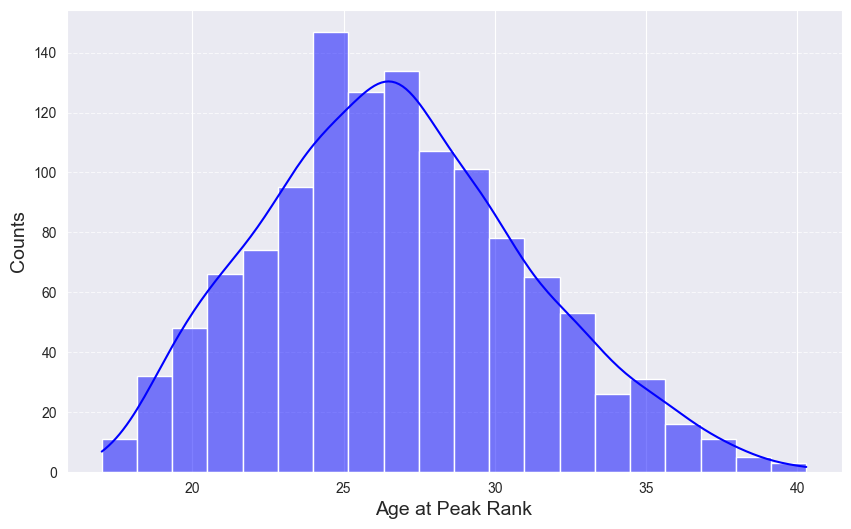

In [4]:
winner_data = matches[['winner_id', 'winner_rank', 'winner_age']].rename(
    columns={'winner_id': 'player_id', 'winner_rank': 'rank', 'winner_age': 'age'}
)
loser_data = matches[['loser_id', 'loser_rank', 'loser_age']].rename(
    columns={'loser_id': 'player_id', 'loser_rank': 'rank', 'loser_age': 'age'}
)

all_players = pd.concat([winner_data, loser_data])

peak_rank_data = all_players.loc[all_players.groupby('player_id')['rank'].idxmin()]

plt.figure(figsize=(10, 6))
sns.histplot(peak_rank_data['age'], bins=20, kde=True, color='blue')
plt.xlabel('Age at Peak Rank', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("../plots/age_importance_plot.pdf", format="pdf",  bbox_inches="tight")

plt.show()